# pynbody tutorial

In [1]:
import pynbody as pb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s=pb.load('Desktop/AHW/test_grafic++.02000')
s

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pynbody/snapshot/tipsy.py:1519: RuntimeWarning: Paramfile suggests time is cosmological, but header values are not sensible in this context.
  "Paramfile suggests time is cosmological, but header values are not sensible in this context.", RuntimeWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pynbody/snapshot/tipsy.py:130: RuntimeWarning: No readable param file in the run directory or parent directory: using defaults.
  "No readable param file in the run directory or parent directory: using defaults.", RuntimeWarning)


<SimSnap "Desktop/AHW/test_grafic++.02000" len=27000000>

In [3]:
s.physical_units()

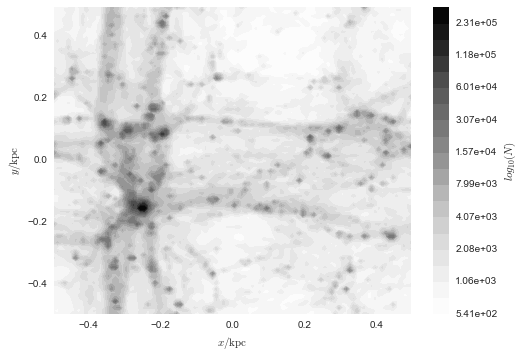

In [4]:
hg = pb.plot.hist2d(s.d['x'], s.d['y'], colorbar=True)

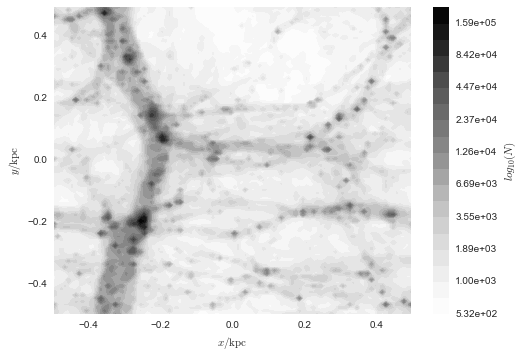

In [6]:
p=pb.plot.hist2d(s.d['x'], s.d['z'], colorbar=True)

In [41]:
s.d.derivable_keys()

['nefe',
 'hetot',
 'mjeans',
 'ofe',
 'ljeans',
 'ne',
 'feh',
 'c_s',
 'mgfe',
 'oxh',
 'HeIII',
 'sife',
 'mjeans_turb',
 'HII',
 'ljeans_turb',
 'hydrogen',
 'c_s_turb',
 'r_mag',
 'i_mag',
 'K_lum_den',
 'vtheta',
 'U_lum_den',
 'vcxy',
 'j2',
 'I_lum_den',
 'u_mag',
 'cs',
 'vr',
 'vt',
 'H_lum_den',
 'V_lum_den',
 'alt',
 'i_lum_den',
 'u',
 'mu',
 'az',
 'I_mag',
 'vrxy',
 'u_lum_den',
 'J_lum_den',
 'k_mag',
 'v_mag',
 'U_mag',
 'v_mean',
 'h_lum_den',
 'v_lum_den',
 'theta',
 'b_mag',
 'zeldovich_offset',
 'j_mag',
 'B_lum_den',
 'jz',
 'j_lum_den',
 'K_mag',
 'V_mag',
 'v2',
 'J_mag',
 'rho',
 'H_mag',
 'h_mag',
 'B_mag',
 'aform',
 'k_lum_den',
 'te',
 'b_lum_den',
 'temp',
 'ke',
 'age',
 'j',
 'smooth',
 'rxy',
 'p',
 'r',
 'R_lum_den',
 'vphi',
 'r_lum_den',
 'R_mag',
 'v_disp']

In [ ]:
s.d['r']

In [3]:
f=pb.filt.BandPass('x', '-0.1 kpc', '0.1 kpc')&pb.filt.BandPass('y', '-0.1 kpc', '0.1 kpc') & pb.filt.BandPass('z', '-0.1 kpc', '0.1 kpc')

In [4]:
s[f]

<SimSnap "Desktop/AHW/test_grafic++.02000:bandpass_x&bandpass_y&bandpass_z" len=204592>

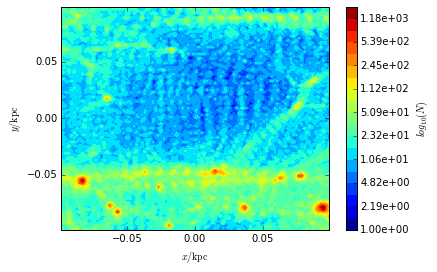

In [5]:
h = pb.plot.hist2d(s[f].d['x'], s[f].d['y'], colorbar=True)

<IPython.core.display.Javascript object>


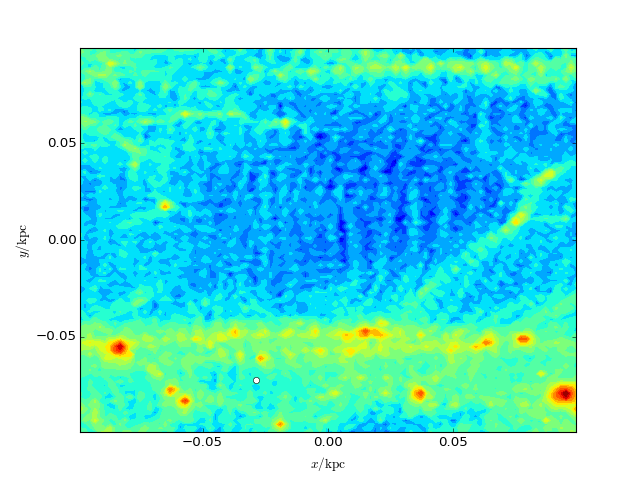

<IPython.core.display.Javascript object>


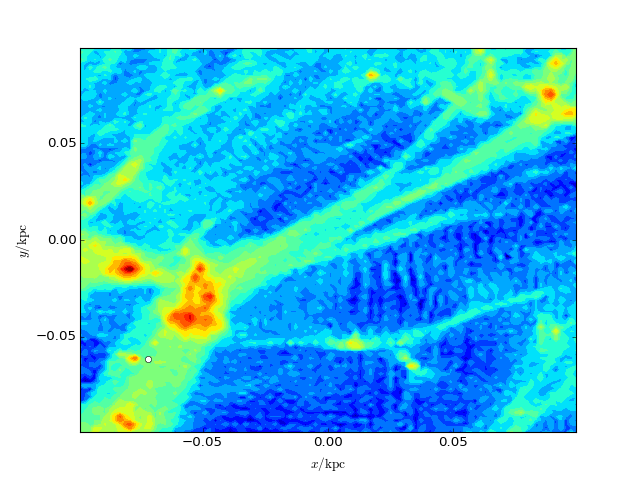

In [124]:
%matplotlib nbagg
v = pb.plot.hist2d(s[f].d['x'], s[f].d['y'])
ind=27837
plt.plot(s[f]['x'][ind], s[f]['y'][ind], 'o', color='white')

plt.figure()
v = pb.plot.hist2d(s[f].d['y'], s[f].d['z'])
plt.plot(s[f]['y'][ind], s[f]['z'][ind], 'wo')

In [127]:
# void = 0, filament = 1, halo = 2
train_class = [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1]
train_ind = [23465, 4371, 11112, 88888, 83764, 76149, 50112, 172653, 5, 198045, 23491, 2318, 27837]

In [128]:
X_train = features[train_ind]
y_train = train_class

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 5)

rf.fit(X_train, y_train)

rf_preds = rf.predict(features)
rf_predprob = rf.predict_proba(features)

<IPython.core.display.Javascript object>


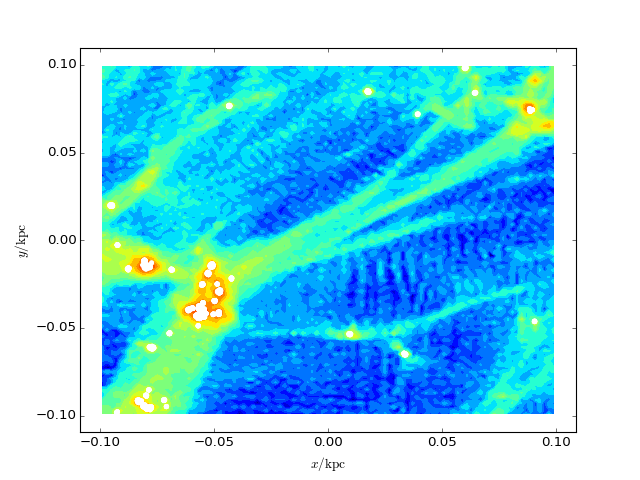

In [134]:
plt.figure()
v = pb.plot.hist2d(s[f].d['y'], s[f].d['z'])

plt.scatter(s[f].d['y'][rf_preds == 2], s[f].d['z'][rf_preds == 2], edgecolor="None", c='w')

<IPython.core.display.Javascript object>


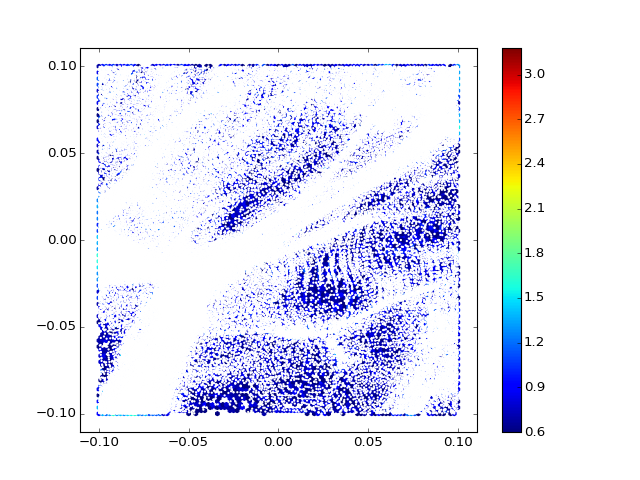

In [143]:
plt.figure()
v = plt.hexbin(s[f].d['y'], s[f].d['z'], bins = 'log', mincnt = 3)
plt.colorbar()
plt.scatter(s[f].d['y'][rf_preds == 1], s[f].d['z'][rf_preds == 1], edgecolor="None", c='w',s = 4)

<IPython.core.display.Javascript object>


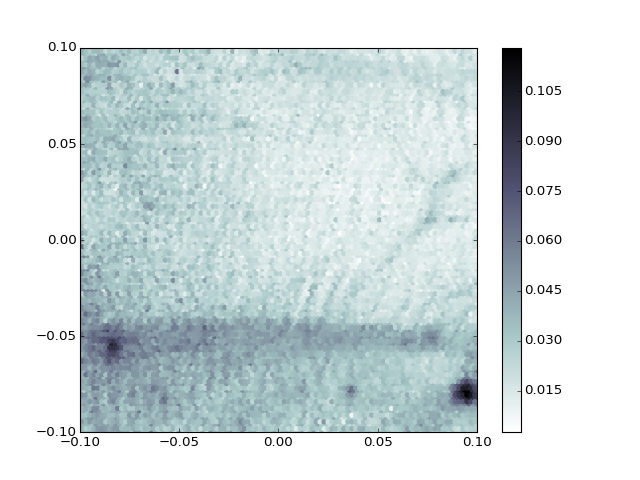

<matplotlib.colorbar.Colorbar instance at 0x1885717e8>

In [67]:
plt.figure()
v = plt.hexbin(s[f].d['x'], s[f].d['y'], C=features[:,1], cmap='bone_r')
plt.colorbar()


In [6]:
data=np.array([s[f].d['x'], s[f].d['y'], s[f].d['z']]).T

In [47]:
features = np.array([s[f].d['rho'], s[f].d['v_disp']]).T

In [48]:
features

array([[ 0.12844247,  0.00400964],
       [ 0.16889747,  0.00623267],
       [ 0.18609935,  0.01205329],
       ..., 
       [ 1.16242048,  0.03098965],
       [ 1.23182072,  0.07602881],
       [ 1.18534229,  0.03023386]])

In [50]:
s[f].d['x'][0], s[f].d['y'][0], s[f].d['z'][0]

(-0.097186967730522156, 0.098067723214626312, -0.098949611186981201)

In [107]:
overden = features[:,0]/np.mean(features[:,0])-1

<IPython.core.display.Javascript object>


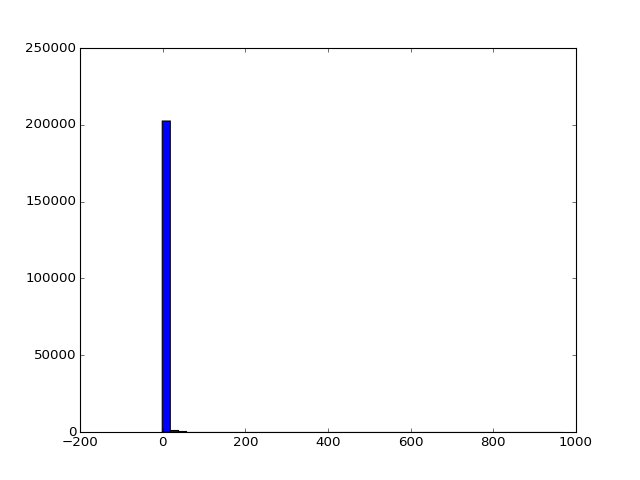

(array([  2.02448000e+05,   1.20200000e+03,   3.72000000e+02,
          1.79000000e+02,   1.10000000e+02,   5.90000000e+01,
          4.10000000e+01,   3.40000000e+01,   2.60000000e+01,
          2.90000000e+01,   1.60000000e+01,   1.40000000e+01,
          1.20000000e+01,   5.00000000e+00,   5.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

In [110]:
plt.figure()
plt.hist(overden,bins=50, range=)

In [86]:
np.mean(features[:,0])

135.84316118651734

<IPython.core.display.Javascript object>


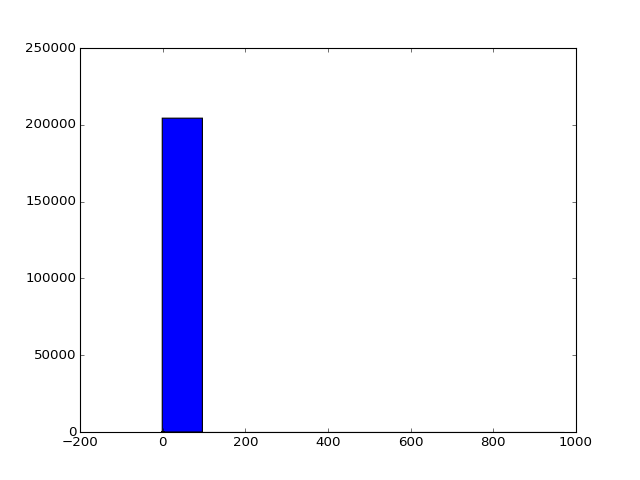

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


In [104]:
plt.figure()
#plt.xscale('log')
plt.plot(np.log10(overden), features[:,1], 'k,')

In [33]:
np.bincount(labels[labels!=-1])

array([ 13,  69,  20, 113,  51,   6,  26,  11,   5,   5,  10,  11,   3,
         6,   4,  10,   8,  18,   7, 236,   5,  22,   8,   5,   8,  11,
        36,   8,  10,   7,   9,   3,  13,  19,  23,  34,  23,  13,   5,
         7,  75,   5, 549,  97,   6,  14,   5,  18,   7,   5,   5,   4,
         5,   8,   7,  15,   7,   6,  11,  18,   5,   5,   5,   5,   7,
         6,   6,   5,   6,   6,  12,   6,  26,   6,   5,   7,   6,   5,
         5,   7,  10,   7,   7,   5,  28,   5,   5,   5,   7,  12,   7,
        12,   5,  26,  13,   5,   6])

In [34]:
nobkd = labels>=0

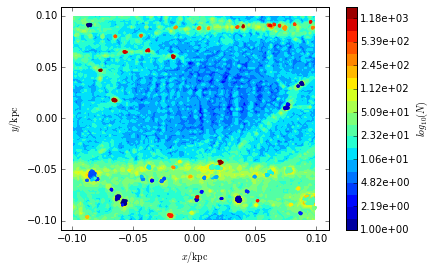

In [36]:
pb.plot.hist2d(s[f].d['x'], s[f].d['y'], colorbar=True)
plt.scatter(sub[nobkd,0], sub[nobkd,1], s=8, edgecolor='none' , c=labels[nobkd])